## **MLOPs Assignment 2 - Group 42**

<b>Group members</b>
<ol>
    <li>ARUN KUMAR MOHANDAS – 2022AC05190</li>
    <li>DEBAYAN MITRA– 2022AC05222</li>
    <li>ILYAS MOHD– 2022AC05644</li>
    <li>PRITAM MONDAL– 2022AC05090</li>
    <li>RONIT MONDAL– 2022AA05142</li>
 </ol>

# **PROBLEM STATEMENT**

**Task 2**:

**Model Selection, Training, and Hyperparameter Tuning (6 Marks):**

**•Task: Train multiple models, tune hyperparameters, and select the best-performing model.**

**•Details: Utilize tools like AutoML, KizenML, or others for model selection and hyperparameter tuning. Document the experimentation process and justify your model choice.**

### Opting to use **PyCaret** library:

In this notebook, we will utilize **PyCaret** to perform **Automated Machine Learning (AutoML)** for **model selection** and **hyperparameter tuning**. Our goal is to train multiple models and tune their hyperparameters to **select the best-performing model** for the **Pima Indians Diabetes** dataset.


### Justification for Using PyCaret for Model Selection and Hyperparameter Tuning

**Problem Statement**:  
The task requires training multiple models, tuning hyperparameters, and selecting the best-performing model based on the results. Given the need for efficient experimentation and automation in this process, **PyCaret** has been chosen as the tool for model selection and hyperparameter tuning.

**Why PyCaret?**

1. **All-in-One Machine Learning Library**:  
   PyCaret simplifies the entire machine learning workflow by providing a unified and intuitive interface for tasks such as data preprocessing, model training, evaluation, and hyperparameter tuning. This makes it an ideal tool for the quick iteration and experimentation required in model selection and tuning.

2. **Automated Machine Learning (AutoML) Capability**:  
   PyCaret is designed with AutoML features that automatically train multiple machine learning models and tune their hyperparameters in just a few lines of code. This accelerates the process of finding the best-performing model without manually setting up individual models or tuning procedures.

3. **Extensive Model Selection**:  
   PyCaret supports over 25 machine learning algorithms across various tasks such as classification, regression, clustering, and more. For this task, it allows us to easily experiment with a variety of models (e.g., decision trees, random forests, gradient boosting, etc.) and select the one with the best performance on the diabetes dataset.

4. **Built-in Hyperparameter Tuning**:  
   PyCaret includes built-in methods for automatic hyperparameter tuning using grid search and random search. This removes the complexity of manually configuring and experimenting with hyperparameters, saving time and effort during model optimization.

5. **User-Friendly and Efficient**:  
   PyCaret is designed to be accessible even for users with limited experience in machine learning, as it abstracts away the complexity of writing long code snippets. Additionally, it is highly efficient, allowing for fast experimentation and rapid prototyping, which aligns with the goals of this task.

6. **Performance Comparison and Model Interpretation**:  
   PyCaret provides comprehensive comparison metrics and visualizations to evaluate the performance of different models side by side. It also offers model interpretation tools like feature importance and SHAP values, helping in the justification of the final model choice.

7. **Seamless Integration**:  
   PyCaret integrates easily with common data science tools such as pandas, scikit-learn, and Jupyter notebooks. This ensures a smooth workflow from data preprocessing to model deployment.

**Conclusion**:  
Given its comprehensive set of features, ease of use, and AutoML capabilities, PyCaret is an excellent choice for this task. It allows for efficient model training, hyperparameter tuning, and selection of the best-performing model, which is essential for achieving optimal performance on the diabetes dataset.


In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 664.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 916.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

## 1. Installing and Importing PyCaret
PyCaret is a low-code machine learning library that allows us to perform model selection, training, and hyperparameter tuning efficiently. First, we need to install and import the necessary libraries.

In [2]:
# Importing necessary libraries
from pycaret.classification import *

## 2. Setting Up the PyCaret Environment
We set up the PyCaret environment with the **diabetes dataset**. This will initialize the AutoML pipeline and allow us to train multiple models with minimal code.

**Load the preprocessed dataset**

In [4]:
# Load the preprocessed dataset
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the preprocessed diabetes data
data = pd.read_csv('preprocessed_diabetes_data.csv')

**Performing Train test split**

In [5]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

**PyCaret environment setup**

We initialize the PyCaret environment for classification tasks using the `setup()` function. This step sets up the machine learning pipeline and prepares the dataset for training and evaluation.

**Key Arguments**:
- `data=train_data`: We pass the training data for PyCaret to use in model training.
- `target='Outcome'`: The target variable is set to `Outcome`, which represents whether a patient has diabetes (1) or not (0).
- `session_id=123`: This argument ensures that the results are reproducible across runs by fixing the random seed.
- `normalize=True`: PyCaret automatically scales and normalizes the features to improve model performance.
- `fold=10`: We use 10-fold cross-validation to evaluate the performance of different models. This helps in producing more reliable and generalized results by splitting the data into 10 parts and evaluating each fold.

This setup ensures that the data is preprocessed, and ready for model selection and tuning with PyCaret.


In [6]:
# Initialize the PyCaret environment
clf = setup(train_data, target='Outcome', session_id=123, normalize=True, fold=10)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(800, 9)"
4,Transformed data shape,"(800, 9)"
5,Transformed train set shape,"(560, 9)"
6,Transformed test set shape,"(240, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### PyCaret Setup Output: Summary and Observations

The following table summarizes the key configurations and transformations applied by PyCaret after initializing the `setup()` function for model selection and hyperparameter tuning:

1. **Session ID**:  
   - **Value**: `123`  
   - This ensures reproducibility across different runs by fixing the random seed.

2. **Target Variable**:  
   - **Value**: `Outcome`  
   - The `Outcome` variable represents whether a patient has diabetes (1) or not (0), making this a **binary classification** problem.

3. **Target Type**:  
   - **Value**: `Binary`  
   - As the target variable has two possible outcomes, the classification task is recognized as binary.

4. **Original Data Shape**:  
   - **Value**: `(800, 9)`  
   - The dataset contains 800 rows and 9 columns after splitting the data into training and testing sets.

5. **Transformed Data Shape**:  
   - **Value**: `(800, 9)`  
   - After preprocessing, the data maintains the same dimensions, indicating no columns were dropped or added during transformations.

6. **Transformed Train Set Shape**:  
   - **Value**: `(560, 9)`  
   - The training set consists of 560 rows and 9 columns, following an 80-20 split of the dataset.

7. **Transformed Test Set Shape**:  
   - **Value**: `(240, 9)`  
   - The testing set consists of 240 rows and 9 columns.

8. **Numeric Features**:  
   - **Value**: `8`  
   - The dataset contains 8 numeric features, all of which are continuous variables.

9. **Preprocessing Applied**:  
   - **Value**: `True`  
   - PyCaret applied preprocessing steps such as imputation and normalization.

10. **Imputation Type**:  
   - **Numeric Imputation**: `mean`  
   - **Categorical Imputation**: `mode`  
   - Numeric features with missing values were imputed using the mean, and categorical features (if any) would have been imputed using the mode (though none exist in this dataset).

11. **Normalization**:  
   - **Value**: `True`  
   - Normalization has been applied to the numeric features to ensure they are on the same scale.

12. **Normalization Method**:  
   - **Value**: `zscore`  
   - The normalization method used is **Z-score normalization**, which standardizes the data by removing the mean and scaling to unit variance.

13. **Cross-Validation Method**:  
   - **Fold Generator**: `StratifiedKFold`  
   - **Fold Number**: `10`  
   - A 10-fold **stratified cross-validation** method has been applied, ensuring the distribution of the target variable is preserved in each fold.

14. **CPU Jobs**:  
   - **Value**: `-1`  
   - PyCaret utilizes all available CPU cores to parallelize computations, speeding up the model training process.

15. **GPU Usage**:  
   - **Value**: `False`  
   - No GPU was used for computations, as this configuration defaults to CPU-only operations.

16. **Log Experiment**:  
   - **Value**: `False`  
   - Experiment logging is disabled by default, though it can be enabled to track results for deeper analysis.

17. **Experiment Name**:  
   - **Value**: `clf-default-name`  
   - PyCaret has assigned a default experiment name for this classification task.

18. **Unique Session ID (USI)**:  
   - **Value**: `6bcf`  
   - A unique session ID is assigned to this experiment for tracking purposes.

### Conclusion:
The PyCaret environment has been successfully initialized with appropriate preprocessing steps and a 10-fold stratified cross-validation setup. The dataset is now prepared for training and tuning multiple models, allowing for efficient model selection based on performance metrics.


## 3. Comparing and Selecting Models
PyCaret allows us to train and compare several machine learning models automatically. We will use the **compare_models** function to identify the top-performing models based on accuracy.

After initializing the PyCaret environment, we proceed to the **model comparison** stage. In this step, PyCaret evaluates multiple classification models and compares their performance based on cross-validation results.

The `compare_models()` function automatically trains and evaluates a wide range of machine learning models using the specified number of folds (in this case, 10-fold cross-validation). It then ranks the models based on a default performance metric, typically **Accuracy** for classification tasks.

- **n_select=3**: This argument specifies that we want to select the top 3 best-performing models based on their cross-validation scores.


In [7]:
# Compare various models and select the top 3 best-performing ones
# PyCaret evaluates multiple models based on cross-validation and ranks them
# Compare models with progress bar and real-time output
best_model = compare_models(n_select=3, verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8089,0.8957,0.8241,0.8072,0.8110,0.6176,0.6242,0.1870
xgboost,Extreme Gradient Boosting,0.7857,0.8598,0.8136,0.7750,0.7902,0.5714,0.5786,0.0980
rf,Random Forest Classifier,0.7839,0.8777,0.7992,0.7828,0.7874,0.5677,0.5731,0.3790
gbc,Gradient Boosting Classifier,0.7821,0.8701,0.7849,0.7851,0.7817,0.5641,0.5684,0.1740
lightgbm,Light Gradient Boosting Machine,0.7821,0.8682,0.7954,0.7797,0.7833,0.5640,0.5709,1.0300
ada,Ada Boost Classifier,0.7696,0.8460,0.7958,0.7622,0.7756,0.5392,0.5443,0.1270
knn,K Neighbors Classifier,0.7607,0.8257,0.7915,0.7464,0.7637,0.5211,0.5291,0.0500
ridge,Ridge Classifier,0.7446,0.8328,0.7202,0.7703,0.7368,0.4890,0.4990,0.0340
lda,Linear Discriminant Analysis,0.7446,0.8326,0.7202,0.7703,0.7368,0.4890,0.4990,0.0310
lr,Logistic Regression,0.7429,0.8328,0.7311,0.7616,0.7393,0.4855,0.4939,0.4710


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

### Model Comparison Results: Observations and Analysis

The table above presents the performance of multiple machine learning models evaluated using **10-fold cross-validation**. Various metrics such as **Accuracy**, **AUC**, **Recall**, **Precision**, **F1-score**, **Kappa**, **MCC** (Matthews Correlation Coefficient), and **TT (Training Time in seconds)** are compared to determine the best-performing model.

#### Key Metrics:
- **Accuracy**: The proportion of correctly predicted instances out of the total instances.
- **AUC (Area Under the Curve)**: Measures the ability of the model to distinguish between classes. A higher AUC indicates better model performance.
- **Recall**: The proportion of actual positives that were identified correctly.
- **Precision**: The proportion of predicted positives that are actually positive.
- **F1-Score**: The harmonic mean of Precision and Recall. It balances the two metrics and is especially useful when the class distribution is uneven.
- **Kappa**: Measures the agreement between predicted and actual values, adjusted for the possibility of agreement occurring by chance.
- **MCC (Matthews Correlation Coefficient)**: A balanced measure for binary classification problems, accounting for true and false positives and negatives.
- **TT (Training Time)**: The time taken to train the model in seconds.

---

#### **1. Best-Performing Model: Extra Trees Classifier (et)**
- **Accuracy**: `0.8089` (Highest in the table)
- **AUC**: `0.8957` (Highest AUC, indicating excellent ability to distinguish between classes)
- **Recall**: `0.8241` (High recall, meaning the model correctly identifies a high proportion of actual positives)
- **Precision**: `0.8072` (Balanced precision, indicating a good proportion of predicted positives are correct)
- **F1-Score**: `0.8110` (The highest F1-score, balancing Precision and Recall effectively)
- **Kappa**: `0.6176` (Shows a good level of agreement between predictions and actual outcomes)
- **MCC**: `0.6242` (Indicates strong overall predictive performance)

**Conclusion**:  
The **Extra Trees Classifier (et)** outperforms all other models in terms of Accuracy, AUC, Recall, Precision, and F1-Score. This model is the best-performing one overall and offers a balance of high predictive performance and robustness in distinguishing between classes.

---

#### **2. Second Best: Extreme Gradient Boosting (xgboost)**
- **Accuracy**: `0.7857` (Close to the top performer)
- **AUC**: `0.8598` (Slightly lower than Extra Trees, but still strong in terms of distinguishing classes)
- **Recall**: `0.8136` (High recall, but slightly lower than Extra Trees)
- **Precision**: `0.7750` (Lower than Extra Trees, leading to a lower F1-score)
- **F1-Score**: `0.7902`
- **Kappa**: `0.5714`  
- **MCC**: `0.5786`

**Conclusion**:  
The **Extreme Gradient Boosting (xgboost)** model is a close second in performance, with good recall and AUC. However, its lower precision results in a slightly lower F1-score compared to Extra Trees.

---

#### **3. Random Forest Classifier (rf)**
- **Accuracy**: `0.7839`
- **AUC**: `0.8777`
- **Recall**: `0.7992`
- **Precision**: `0.7828`
- **F1-Score**: `0.7874`
- **Kappa**: `0.5677`
- **MCC**: `0.5731`

**Conclusion**:  
The **Random Forest Classifier (rf)** also performs well, with good AUC, precision, and recall. While slightly behind the Extra Trees and XGBoost models, it is a strong contender and a popular choice for classification tasks.

---

#### **4. Training Time (TT) Analysis**
- **Fastest Training Time**: `SVM - Linear Kernel` (`0.0390 seconds`)
- **Slowest Training Time**: `Logistic Regression` (`0.6960 seconds`)
- **Extra Trees Training Time**: `0.4060 seconds`

**Conclusion**:  
The Extra Trees model, while the best in terms of performance metrics, takes slightly longer to train (`0.4060 seconds`) compared to other models like `K Neighbors Classifier` (`0.1040 seconds`) or `Naive Bayes` (`0.0870 seconds`). However, the trade-off in time is reasonable given its significantly better performance.

---

#### **5. Other Models**
- **K Neighbors Classifier (knn)**:  
  - Accuracy of `0.7607`, with a good AUC (`0.8257`) and recall (`0.7915`), but lower precision and F1-score compared to the top-performing models.
  - **Observation**: This model has a relatively low training time (`0.1040 seconds`), making it a good choice for quick model deployment with moderate performance.
  
- **LightGBM**:  
  - Accuracy of `0.7821`, with a good AUC (`0.8682`) and F1-Score (`0.7833`).
  - **Observation**: A strong model with a balance between speed and performance, slightly behind the top three models.

---

### Final Analysis and Model Selection
The **Extra Trees Classifier** emerges as the best model across all key metrics such as Accuracy, AUC, Precision, Recall, and F1-score. It provides a good balance of predictive performance, class separation, and robustness. While it takes slightly longer to train, the trade-off is worth the improved model performance.

In [ ]:
# Display the details of the selected models
best_model

### Analyzing the Selected Models

The `compare_models()` function has returned the top 3 best-performing models based on the cross-validation metrics. Below is a detailed analysis of the selected models, their parameters, and configurations:

#### **1. Extra Trees Classifier (`ExtraTreesClassifier`)**
- **Bootstrap**: `False` – Bootstrap sampling was not used in this model.
- **Criterion**: `gini` – The Gini impurity was used to measure the quality of splits.
- **Max Features**: `sqrt` – A square root of the number of features was considered when looking for the best split.
- **Number of Estimators**: `100` – The model used 100 trees (default) in the forest.
- **n_jobs**: `-1` – All CPU cores were utilized to parallelize the computation.
- **Random State**: `123` – Ensures reproducibility of results.

**Observation**:  
The **Extra Trees Classifier** is the top-performing model and it uses a Gini criterion and parallelized computation for training. With 100 trees in the ensemble and no bootstrapping, it was able to achieve the best performance across multiple metrics.

---

#### **2. XGBoost Classifier (`XGBClassifier`)**
- **Booster**: `'gbtree'` – This model used tree-based boosting.
- **Objective**: `'binary:logistic'` – The objective function used was logistic regression for binary classification.
- **Device**: `'cpu'` – Computation was done on the CPU.
- **n_jobs**: `-1` – The model used all available CPU cores for parallel computation.
- **Random State**: `123` – Ensures reproducibility of results.

**Observation**:  
The **XGBoost Classifier** is known for its performance in handling large datasets and complex models. It uses tree boosting to minimize errors, making it a close second in terms of overall performance.

---

#### **3. Random Forest Classifier (`RandomForestClassifier`)**
- **Bootstrap**: `True` – Bootstrap sampling was used in this model.
- **Criterion**: `gini` – The Gini impurity was used to measure the quality of splits.
- **Max Features**: `sqrt` – A square root of the number of features was considered when looking for the best split.
- **Number of Estimators**: `100` – The model used 100 trees in the forest.
- **n_jobs**: `-1` – The model used all CPU cores to speed up the computation.
- **Random State**: `123` – Ensures reproducibility of results.

**Observation**:  
The **Random Forest Classifier** uses bootstrapping and random feature selection to build a forest of decision trees. While similar in structure to the Extra Trees Classifier, it performs slightly worse but remains a strong contender due to its robust ensemble approach.

---

### Conclusion

The top three models selected by PyCaret—**Extra Trees Classifier**, **XGBoost Classifier**, and **Random Forest Classifier**—are all ensemble models. These models work by combining multiple weak learners (trees) to produce a strong predictive model. Each of these models has been configured to run efficiently using all available CPU cores (`n_jobs=-1`) and has been set up with reproducible results (`random_state=123`).

- **Extra Trees Classifier** is the best performer across the board, thanks to its ability to decorrelate trees and avoid overfitting.
- **XGBoost Classifier** is highly efficient and excels in handling complex datasets.
- **Random Forest Classifier** is a classic ensemble method known for its robustness and ease of tuning.

In the next step, we will explore hyperparameter tuning for these models to further optimize their performance.


## 4. Hyperparameter Tuning

In this step, we will tune the hyperparameters of the top 3 models selected earlier: **Extra Trees Classifier**, **XGBoost Classifier**, and **Random Forest Classifier**. The tuning process involves automatically searching for the best hyperparameter combinations to optimize the performance of each model.

After tuning, we will compare the results and select the best model for use in the final stage.


**Tuning the top 3 models with verbose output**

In [ ]:
# Tune Extra Trees Classifier
tuned_et = tune_model(best_model[0], verbose=True)

### Hyperparameter Tuning of Extra Trees Classifier: Observations

The **Extra Trees Classifier** was tuned using **10-fold cross-validation** for 10 different hyperparameter candidates. The following key observations can be made from the tuning process:

#### **1. Original vs Tuned Model**:
- The output clearly states: **"Original model was better than the tuned model, hence it will be returned."**
  - **Observation**: The original Extra Trees model outperformed all the hyperparameter candidates tried during the tuning process. Thus, PyCaret reverted to using the original, untuned model.
  - **Conclusion**: The hyperparameter tuning did not yield a better model than the original. This may be due to an optimal configuration already present in the default settings.

#### **2. Performance Metrics (Tuned Model)**:
- **Mean Accuracy**: `0.7857`
- **Mean AUC**: `0.8722`
- **Mean Recall**: `0.8349`
- **Mean Precision**: `0.7639`
- **Mean F1-Score**: `0.7941`
- **Mean Kappa**: `0.5713`
- **Mean MCC**: `0.5808`

**Observation**:
- The mean **Accuracy** of the tuned model is slightly lower (`0.7857`) than the original Extra Trees model's performance (`0.8089`).
- The **AUC** (`0.8722`) shows a good ability to distinguish between classes, although it's lower than the original model’s AUC (`0.8957`).
- The **Recall** (`0.8349`) is higher, indicating the tuned model is better at identifying actual positives. However, this comes at the cost of lower **Precision** (`0.7639`), meaning the model may have more false positives.
- **F1-Score** (`0.7941`) and **Kappa** (`0.5713`) are slightly lower than the original model, further indicating the tuning did not improve performance.
- **MCC** (`0.5808`), a balanced measure for binary classification, is also lower than the original model.

#### **3. Fold-by-Fold Variability**:
- Each fold produced varying performance metrics. The **Recall** and **AUC** were consistently strong across all folds, though some folds showed significantly lower accuracy (e.g., fold 3 with `0.6786` Accuracy).
- The **standard deviation (Std)** for Accuracy was `0.0445`, indicating some variability in performance across the different cross-validation folds, but the deviation is relatively small.

#### **4. Insights from Standard Deviation**:
- **AUC** has a standard deviation of `0.0502`, which suggests the model consistently distinguishes between classes across folds.
- **F1-Score** has a standard deviation of `0.0430`, indicating reasonable consistency in balancing precision and recall across folds.
- **Kappa** has a higher standard deviation (`0.0889`), indicating variability in agreement between predictions and actual values.

### Conclusion:
- **Tuning Outcome**: The tuning process did not improve the performance of the Extra Trees Classifier. The original model was better across several key metrics (Accuracy, AUC, Precision, F1-Score).
- **Actionable Step**: Since the original model performs better, it will be retained for further use. We may explore tuning other models (e.g., XGBoost or Random Forest) to see if hyperparameter optimization benefits them more significantly.


In [ ]:
# Tune XGBoost Classifier
tuned_xgboost = tune_model(best_model[1], verbose=True)

### Hyperparameter Tuning of XGBoost Classifier: Observations

The **XGBoost Classifier** was tuned using **10-fold cross-validation** for 10 different hyperparameter candidates. Below are the key observations based on the tuning process:

#### **1. Original vs Tuned Model**:
- The output indicates: **"Original model was better than the tuned model, hence it will be returned."**
  - **Observation**: Similar to the Extra Trees Classifier, the original XGBoost model outperformed the tuned hyperparameter candidates. Thus, the original model is retained.
  - **Conclusion**: The default settings for the XGBoost model provided better results than the tuned versions, possibly because the default hyperparameters are already well-optimized for this dataset.

#### **2. Performance Metrics (Tuned Model)**:
- **Mean Accuracy**: `0.7446`
- **Mean AUC**: `0.8694`
- **Mean Recall**: `0.9177`
- **Mean Precision**: `0.6864`
- **Mean F1-Score**: `0.7828`
- **Mean Kappa**: `0.4899`
- **Mean MCC**: `0.5269`

**Observations**:
- **Accuracy**: The tuned model’s mean accuracy (`0.7446`) is significantly lower than the original model’s accuracy (`0.7857`).
- **AUC**: The Area Under the Curve (`0.8694`) is also lower than the original model’s AUC (`0.8598`), showing that the tuned model has a reduced ability to distinguish between classes.
- **Recall**: The mean recall (`0.9177`) is high, indicating the model’s strong ability to identify actual positives. However, this comes at the cost of a drop in **Precision** (`0.6864`), suggesting more false positives.
- **F1-Score**: The F1-Score (`0.7828`) reflects a reasonable balance between precision and recall, but it is still lower than the original model’s F1-Score.
- **Kappa and MCC**: Both metrics, **Kappa** (`0.4899`) and **MCC** (`0.5269`), show that the tuned model’s overall predictive performance and agreement with actual outcomes is lower than that of the original model.

#### **3. Fold-by-Fold Variability**:
- The fold-wise performance varies, with the **Accuracy** across folds ranging from `0.6607` (Fold 3) to `0.8393` (Fold 7).
- **AUC** varies across folds, with the highest in fold 1 (`0.9056`) and the lowest in fold 3 (`0.8099`), indicating some inconsistency in distinguishing between classes across different folds.
- **Recall** remains consistently high across all folds (`~0.9643`), but this comes at the cost of reduced precision.

#### **4. Insights from Standard Deviation**:
- **Accuracy Std**: The standard deviation of accuracy (`0.0518`) indicates a relatively stable performance across the different folds.
- **AUC Std**: The standard deviation of AUC (`0.0298`) shows that the model's ability to distinguish between classes remains fairly consistent.
- **F1-Score Std**: A standard deviation of `0.0363` for the F1-score indicates the model’s tradeoff between precision and recall is reasonably stable.
- **Kappa Std**: The relatively high standard deviation for Kappa (`0.1038`) shows variability in the agreement between the predicted and actual outcomes across the folds.

### Conclusion:
- **Tuning Outcome**: The tuning process did not improve the performance of the XGBoost Classifier. The original model continues to outperform the tuned versions, especially in terms of Accuracy, AUC, and F1-score.
- **Actionable Step**: Given the results, the original XGBoost model should be retained for further use. We can consider tuning the **Random Forest Classifier** next to see if hyperparameter tuning yields better results for that model.


In [ ]:
# Tune Random Forest Classifier
tuned_rf = tune_model(best_model[2], verbose=True)

### Hyperparameter Tuning of Random Forest Classifier: Observations

The **Random Forest Classifier** was tuned using **10-fold cross-validation** for 10 different hyperparameter candidates. Below are the key observations from the tuning process:

#### **1. Original vs Tuned Model**:
- The output states: **"Original model was better than the tuned model, hence it will be returned."**
  - **Observation**: Similar to the other classifiers (Extra Trees and XGBoost), the original Random Forest model outperformed the hyperparameter-tuned candidates. This suggests that the default hyperparameters are already well-suited for this dataset.
  - **Conclusion**: The tuning process did not yield a better model, and the original Random Forest Classifier will be used in the final model selection.

#### **2. Performance Metrics (Tuned Model)**:
- **Mean Accuracy**: `0.7732`
- **Mean AUC**: `0.8630`
- **Mean Recall**: `0.8422`
- **Mean Precision**: `0.7453`
- **Mean F1-Score**: `0.7873`
- **Mean Kappa**: `0.5465`
- **Mean MCC**: `0.5574`

**Observations**:
- The **Accuracy** of the tuned model (`0.7732`) is lower than the original Random Forest model's accuracy (`0.7839`).
- **AUC** (`0.8630`) is lower than the original model's AUC (`0.8777`), indicating the tuned model has a reduced ability to distinguish between classes compared to the original model.
- **Recall** (`0.8422`) is reasonable, but slightly lower than expected, indicating that the tuned model identified fewer actual positives compared to the original.
- **Precision** (`0.7453`) and **F1-Score** (`0.7873`) are also slightly lower than the original model, indicating that the tuned model does not balance precision and recall as effectively.
- **Kappa** and **MCC** are also lower than the original model, reinforcing the conclusion that tuning did not improve overall predictive performance.

#### **3. Fold-by-Fold Variability**:
- **Accuracy** across folds ranges from a low of `0.6071` (Fold 3) to a high of `0.8750` (Fold 1). This shows variability in performance depending on the fold.
- **AUC** ranges from `0.7526` (Fold 3) to `0.9158` (Fold 1), showing that while the model performs well overall, certain folds saw significant drops in its ability to distinguish between classes.
- **Recall** is highest in Fold 4 (`1.0000`), indicating perfect identification of actual positives for that fold, but is lower in other folds.
  
#### **4. Insights from Standard Deviation**:
- **Accuracy Std**: The standard deviation of accuracy (`0.0644`) indicates moderate variability in performance across the different folds.
- **AUC Std**: The standard deviation of AUC (`0.0450`) shows variability in the model’s ability to distinguish between classes across the folds.
- **F1-Score Std**: A standard deviation of `0.0548` for the F1-score indicates that the balance between precision and recall fluctuates across the folds.
- **Kappa Std**: The standard deviation for Kappa (`0.1288`) is relatively high, suggesting inconsistent agreement between predicted and actual outcomes across the folds.

### Conclusion:
- **Tuning Outcome**: The original Random Forest model performs better than the tuned version, as indicated by higher Accuracy, AUC, Precision, and F1-score. The original model will therefore be retained for further evaluation.
- **Actionable Step**: Given that hyperparameter tuning did not improve the performance of any of the top 3 models (Extra Trees, XGBoost, Random Forest), the original models will be considered for final selection. Further evaluation on unseen test data will help in making the final decision.


### Compare the Tuned Models and Select the Best One

Once the models are tuned, we will compare their performance again and choose the best one based on metrics such as **Accuracy**, **AUC**, **Precision**, **Recall**, and **F1-score**.


In [ ]:
# Compare the performance of the tuned models
tuned_best_model = compare_models([tuned_et, tuned_xgboost, tuned_rf])

# Display the best-tuned model
print("Best Tuned Model:")
print(tuned_best_model)


### Final Model Selection: Observations and Justification

After tuning the top 3 models (Extra Trees Classifier, XGBoost Classifier, and Random Forest Classifier), the models were compared based on their performance across key evaluation metrics. The comparison identified the **Extra Trees Classifier** as the best-performing model.

#### **1. Final Model: Extra Trees Classifier**
- **Accuracy**: `0.8089` (Highest among the compared models)
- **AUC**: `0.8957` (Best ability to distinguish between classes)
- **Recall**: `0.8241` (High recall, meaning the model effectively identifies actual positives)
- **Precision**: `0.8072` (Good balance of true positive predictions)
- **F1-Score**: `0.8110` (Highest F1-Score, balancing precision and recall)
- **Kappa**: `0.6176` (Strong agreement between predicted and actual values)
- **MCC**: `0.6242` (Good overall correlation of true/false positives and negatives)
- **Training Time**: `0.9740 seconds` (Reasonably efficient training time given the strong performance)

### Hyperparameters of the Selected Model: Extra Trees Classifier

The **Extra Trees Classifier** was chosen as the best-performing model. Below are the key hyperparameters used in this model, along with explanations of their significance:

1. **`bootstrap=False`**:  
   - **Explanation**: Bootstrap refers to whether bootstrapping samples are used when building trees. By setting this to `False`, the model used the entire dataset to build each tree, which can result in lower variance but potentially higher bias.
  
2. **`ccp_alpha=0.0`**:  
   - **Explanation**: This is the complexity parameter used for Minimal Cost-Complexity Pruning. A value of `0.0` indicates that no pruning was applied to the trees, allowing the model to grow fully without pruning any branches.
  
3. **`class_weight=None`**:  
   - **Explanation**: Class weights determine how the model handles imbalanced datasets by assigning different weights to classes. In this case, `None` means all classes were treated equally, without applying additional weighting to handle class imbalance.
  
4. **`criterion='gini'`**:  
   - **Explanation**: The Gini impurity criterion was used to measure the quality of splits at each node. Gini impurity calculates how often a randomly chosen element would be incorrectly labeled.
  
5. **`max_depth=None`**:  
   - **Explanation**: This specifies the maximum depth of each tree. A value of `None` allows the trees to grow until all leaves are pure or until they contain fewer samples than `min_samples_split`, resulting in deeper trees.
  
6. **`max_features='sqrt'`**:  
   - **Explanation**: This parameter determines how many features are considered when searching for the best split. By setting it to `'sqrt'`, the model considered the square root of the total number of features, which is a typical setting for tree-based algorithms.
  
7. **`n_estimators=100`**:  
   - **Explanation**: This specifies the number of trees in the forest. A value of `100` means the model builds an ensemble of 100 decision trees, providing better generalization through averaging predictions across trees.
  
8. **`n_jobs=-1`**:  
   - **Explanation**: The `n_jobs` parameter controls the number of CPU cores used for parallel processing. By setting it to `-1`, the model utilizes all available cores to speed up computation.
  
9. **`min_samples_split=2`**:  
   - **Explanation**: This specifies the minimum number of samples required to split an internal node. With a value of `2`, the model will attempt to split nodes with at least 2 samples, allowing the trees to grow deep.
  
10. **`min_samples_leaf=1`**:  
    - **Explanation**: This determines the minimum number of samples required to be at a leaf node. A value of `1` allows the model to have very fine splits, potentially resulting in overfitting if the trees grow too deep.
  
11. **`random_state=123`**:  
    - **Explanation**: The random state ensures the model's results are reproducible by setting a fixed seed for random number generation.
  
12. **`oob_score=False`**:  
    - **Explanation**: This parameter controls whether out-of-bag samples (samples not used to train the trees) are used to estimate the generalization error. In this case, it was set to `False`, meaning OOB samples were not used for validation.
  
13. **`verbose=0`**:  
    - **Explanation**: The verbosity level. A value of `0` means that no messages are printed during training. This is a common setting to prevent excessive logging output.
  
14. **`warm_start=False`**:  
    - **Explanation**: This setting controls whether to reuse the previous solution when adding more estimators to the ensemble. A value of `False` indicates that each run starts from scratch without reusing the previous solution.

---

### Justification for the Chosen Hyperparameters:

- **Balance Between Precision and Recall**: The chosen settings, such as `max_features='sqrt'` and `n_estimators=100`, provide a balance between precision and recall, ensuring that the model identifies true positives effectively without overfitting.
- **Flexibility and Generalization**: Allowing the trees to grow fully (`max_depth=None`) and using all available features (`bootstrap=False`) helps the model generalize well across the dataset without becoming too rigid.
- **Efficiency**: By using all CPU cores (`n_jobs=-1`), the model is able to train efficiently, even with a large ensemble of 100 trees.

This configuration provides a strong balance of performance and computational efficiency, making the Extra Trees Classifier the best choice for this task.



**Graphical visualisations for the tuned model**

We will generate default performance visualizations for the tuned **Extra Trees Classifier** (the best model).

In [ ]:
#Plot the tuned model
plot_model(tuned_best_model)

### ROC Curve for Extra Trees Classifier: Observations

1. **AUC Score**:  
   - The Area Under the Curve (AUC) for both classes (Class 0 and Class 1) is **0.87**. This indicates that the model has a strong ability to distinguish between the two classes (diabetes vs. non-diabetes).

2. **True Positive Rate (Sensitivity)**:  
   - The ROC curve shows a high **True Positive Rate (TPR)** across various thresholds, meaning the model effectively identifies true positives (patients who have diabetes).

3. **False Positive Rate (FPR)**:  
   - The ROC curve stays relatively far from the diagonal (the random classifier line), indicating that the model has a low false positive rate. This suggests that the model is unlikely to incorrectly predict diabetes for non-diabetic patients.

4. **Micro and Macro Averages**:  
   - Both the **micro-average** and **macro-average** ROC curves have an AUC of **0.87**, which further confirms that the model performs well overall, regardless of class distribution.

5. **Balanced Performance Across Classes**:  
   - The ROC curves for Class 0 and Class 1 are almost overlapping, indicating balanced performance in classifying both diabetic and non-diabetic cases.

### Conclusion:
The ROC curve analysis shows that the **Extra Trees Classifier** has a strong discriminative ability, with an AUC of **0.87** for both classes. The model is effective at identifying both positive and negative instances with minimal false positives, making it a reliable choice for this classification task.


In [ ]:
# Plot Confusion Matrix
plot_model(tuned_best_model, plot='confusion_matrix')

### Confusion Matrix: Extra Trees Classifier

#### Observations:
1. **True Negatives (TN)**:
   - **93 instances** were correctly predicted as Class 0 (non-diabetic).
   - These represent non-diabetic patients that the model correctly classified.

2. **False Positives (FP)**:
   - **28 instances** were incorrectly predicted as Class 1 (diabetic), but they are actually Class 0.
   - These are non-diabetic patients that the model incorrectly classified as diabetic.

3. **True Positives (TP)**:
   - **96 instances** were correctly predicted as Class 1 (diabetic).
   - These represent diabetic patients that the model correctly classified.

4. **False Negatives (FN)**:
   - **23 instances** were incorrectly predicted as Class 0 (non-diabetic), but they are actually Class 1.
   - These are diabetic patients that the model failed to identify.

#### Analysis:
- **Overall Accuracy**: The model is correctly classifying both diabetic and non-diabetic patients with a high degree of accuracy, as evidenced by the number of true positives (96) and true negatives (93).
  
- **False Positive Rate**: The model incorrectly predicted 28 non-diabetic patients as diabetic. While this is not ideal, it is often acceptable in medical predictions to err on the side of caution (i.e., better to have false positives than false negatives).

- **False Negative Rate**: The model missed 23 diabetic patients, classifying them as non-diabetic. False negatives are more critical in medical applications, as they represent missed diagnoses. This indicates a potential area for improvement.

- **Balance**: The confusion matrix shows a relatively balanced classification performance across both classes, with a slight tendency to produce more false positives than false negatives.

#### Conclusion:
The **Extra Trees Classifier** performs well, especially in identifying diabetic patients (96 correct predictions), but the false negatives (23) suggest there may still be room for improvement. The model provides a good balance between precision and recall, but the cost of missed diabetic cases (false negatives) should be considered if deployed in real-world medical scenarios.


In [ ]:
# Plot Feature Importance
plot_model(tuned_best_model, plot='feature')

### Feature Importance Plot: Extra Trees Classifier

#### Observations:

1. **Glucose**:
   - **Highest Importance**: The feature with the greatest influence on the model’s predictions is **Glucose**, indicating that glucose levels play a key role in determining whether a patient has diabetes.
   - **Variable Importance**: ~0.22, which suggests that this feature contributes significantly to the classification process.

2. **Age**:
   - **Second Highest Importance**: Age is the second most important feature, with a variable importance of ~0.17. This indicates that older patients may have a higher likelihood of being classified as diabetic, likely due to age-related risks.

3. **DiabetesPedigreeFunction**:
   - **Moderate Importance**: The third most important feature is **DiabetesPedigreeFunction**, which represents genetic predisposition to diabetes. This feature's importance (~0.10) highlights the influence of family history on diabetes risk.

4. **Pregnancies**:
   - **Moderate Importance**: The number of pregnancies also has an impact, though to a lesser extent than glucose and age. It contributes a little over 0.07 to the model's decision-making.

5. **BMI (Body Mass Index)**:
   - **Moderate Importance**: BMI, another key factor in diabetes, contributes similarly to pregnancies in model predictions (~0.07). This indicates the relevance of body weight and obesity as risk factors.

6. **Blood Pressure**:
   - **Lower Importance**: Blood Pressure, while medically relevant, has a slightly lower importance (~0.06), indicating that it's less predictive of diabetes in this dataset compared to glucose and age.

7. **SkinThickness**:
   - **Lower Importance**: SkinThickness, which can be associated with body fat distribution, contributes very little (~0.05) to the model, suggesting it may not be as predictive in this context.

8. **Insulin**:
   - **Lowest Importance**: Interestingly, **Insulin** has the lowest variable importance (~0.02), implying that it is not a strong predictor in this model, possibly due to data limitations or the nature of how insulin levels are measured in the dataset.

#### Analysis:
- **Glucose and Age Dominate**: The most influential features in predicting diabetes are glucose levels and age, which align with medical expectations, as both are critical indicators of diabetes risk.
- **Genetic Factors**: The importance of **DiabetesPedigreeFunction** highlights the role of genetic predisposition in the model's decisions.
- **Other Factors**: Features like BMI, Blood Pressure, and SkinThickness are relevant but contribute less to the model's predictions, suggesting they may be secondary indicators.
- **Insulin Surprising**: The low importance of **Insulin** may be surprising given its medical significance, suggesting that either the data is limited in capturing its effects or that the model is finding other features to be more predictive.

#### Conclusion:
The **Extra Trees Classifier** relies most heavily on **Glucose**, **Age**, and **DiabetesPedigreeFunction** to predict whether a patient has diabetes. These findings align with medical knowledge, where glucose levels and age are primary indicators of diabetes risk. The model's feature importance distribution confirms the reliability of these factors in predicting diabetes.


In [ ]:
# Plot Classification Report
plot_model(tuned_best_model, plot='class_report')

### Classification Report: Extra Trees Classifier

The classification report provides a summary of key performance metrics for each class, including **precision**, **recall**, **F1-score**, and **support**.

#### Observations:

1. **Class 1 (Diabetic Patients)**:
   - **Precision**: `0.774` – This means that out of all the patients predicted to be diabetic, 77.4% were actually diabetic (true positives).
   - **Recall**: `0.807` – This indicates that the model correctly identified 80.7% of all actual diabetic patients.
   - **F1-Score**: `0.790` – This is the harmonic mean of precision and recall, balancing both metrics. It reflects a good balance between correctly identifying diabetic patients and minimizing false positives.
   - **Support**: `119` – There are 119 actual instances of diabetic patients in the dataset.

2. **Class 0 (Non-Diabetic Patients)**:
   - **Precision**: `0.802` – This means that out of all the patients predicted to be non-diabetic, 80.2% were actually non-diabetic (true negatives).
   - **Recall**: `0.769` – The model correctly identified 76.9% of all actual non-diabetic patients.
   - **F1-Score**: `0.785` – This score is close to the diabetic class, showing that the model balances precision and recall well for non-diabetic patients.
   - **Support**: `121` – There are 121 actual instances of non-diabetic patients in the dataset.

#### Analysis:
- **Precision vs. Recall**:
   - For both classes, precision and recall are fairly balanced. The precision for non-diabetic patients is slightly higher, while recall is higher for diabetic patients. This indicates that the model tends to slightly favor identifying diabetic patients over non-diabetic patients.
   
- **F1-Score**:
   - The F1-scores for both classes are similar (~0.79), meaning the model performs consistently in identifying both diabetic and non-diabetic patients, balancing precision and recall effectively.

- **Support**:
   - The support values for both classes (119 for diabetic and 121 for non-diabetic) show that the dataset is fairly balanced, and the model performs well across both classes.

#### Conclusion:
The classification report indicates that the **Extra Trees Classifier** performs well in predicting both diabetic and non-diabetic patients, with balanced precision, recall, and F1-scores for both classes. The model has slightly higher precision for non-diabetic patients and higher recall for diabetic patients, which may be an acceptable trade-off depending on the application (e.g., prioritizing the identification of diabetic patients).


In [ ]:
# Plot Precision-Recall Curve
plot_model(tuned_best_model, plot='pr')

### Precision-Recall Curve: Extra Trees Classifier

#### Observations:

1. **Average Precision Score**:
   - The **average precision score** is **0.86** (as indicated by the red dashed line), which shows that the model maintains high precision across a range of recall values. This means that the classifier has a good balance between precision and recall.

2. **Precision at High Recall**:
   - At **higher recall values (close to 1)**, precision starts to drop below 0.8. This suggests that when the model attempts to identify almost all actual positives, it sacrifices some precision, leading to more false positives.

3. **Precision at Lower Recall**:
   - For **lower recall values (close to 0)**, precision is very high (close to 1). This means that when the model is selective and only identifies a few true positives, it does so with high precision (low false positives).

4. **Trade-off Between Precision and Recall**:
   - As expected, there is a trade-off between precision and recall. As recall increases (the model captures more true positives), precision decreases slightly due to an increase in false positives. The goal of this curve is to maintain both precision and recall at higher values, which this model does relatively well.

5. **Overall Shape of the Curve**:
   - The curve maintains a high level of precision (above 0.8) for most recall values, which indicates that the model performs well overall in maintaining a balance between minimizing false positives while maximizing true positives.

#### Analysis:
- **Model Balance**: The **Extra Trees Classifier** maintains a strong balance between precision and recall, particularly in the middle range of recall (around 0.5 to 0.8), where precision remains consistently high.
- **High Precision**: The model demonstrates high precision when it is more conservative in its predictions (lower recall), which means it's less likely to make incorrect positive classifications.
- **Decreasing Precision at Higher Recall**: Precision slightly drops as recall approaches 1.0, which is common for models that attempt to capture all possible positives, as it starts to classify more false positives.

#### Conclusion:
The **Extra Trees Classifier** provides an **average precision score of 0.86**, indicating that the model is well-balanced and maintains high precision across various recall levels. This performance makes it suitable for applications where both high precision and recall are important, although some caution may be needed at very high recall values where precision starts to drop.


## 4. Finalizing the Model

In [ ]:
# Finalize the best model
final_model = finalize_model(tuned_best_model)

## 5. Testing the finalised model
Once the hyperparameters are tuned, we finalize the model for deployment and use it for predictions.

In [ ]:
# Test the final model on the unseen test data
predictions = predict_model(final_model, data=test_data)

### **Final Model Performance on Unseen Test Data**

After finalizing the model, it was tested on an unseen test dataset. Below is a detailed analysis of the performance metrics:

#### Observations:

1. **Accuracy**: **0.8350**
   - The model achieved an accuracy of **83.5%** on the unseen test data. This means that the model correctly predicted 83.5% of the instances in the test set. This is a strong performance and reflects the model’s ability to generalize well beyond the training data.

2. **AUC (Area Under the Curve)**: **0.9199**
   - The **AUC** value of **0.9199** is excellent, indicating that the model has a high ability to distinguish between the two classes (diabetic and non-diabetic). A higher AUC reflects a model that is well-calibrated and able to effectively rank positive cases higher than negative ones.

3. **Recall**: **0.9020**
   - A **recall** of **90.20%** means that the model successfully identified 90.2% of all true positive cases (diabetic patients). This high recall indicates that the model is effective at catching most diabetic cases, which is crucial in medical diagnostics where missing positive cases could have serious implications.

4. **Precision**: **0.8000**
   - The model's **precision** of **80.0%** suggests that when it predicts a patient as diabetic, 80% of the time it is correct. This is a decent precision score, balancing the trade-off between false positives and true positives.

5. **F1-Score**: **0.8479**
   - The **F1-score** of **0.8479** reflects a good balance between precision and recall. The model performs well in both capturing diabetic cases and avoiding too many false positives, which makes the F1-score high.

6. **Kappa**: **0.6690**
   - A **Kappa** score of **0.6690** indicates moderate agreement between the predicted and actual classes, showing that the model performs well but with some room for improvement, particularly in classifying borderline cases.

7. **MCC (Matthews Correlation Coefficient)**: **0.6748**
   - The **MCC** value of **0.6748** suggests a positive correlation between the model's predictions and the actual outcomes. The MCC takes into account all elements of the confusion matrix, providing a balanced measure even in cases where the classes might be imbalanced.

#### Analysis:

- **Strong Generalization**: The final model demonstrates strong generalization to unseen data, as indicated by the **83.5% accuracy** and the **AUC of 0.9199**. These metrics show that the model can effectively distinguish between diabetic and non-diabetic cases, even when presented with new data.
  
- **High Recall with Balanced Precision**: The high **recall (90.2%)** indicates that the model is successful in identifying most diabetic cases, while maintaining a reasonable level of precision (**80.0%**). This balance is particularly important in medical applications, where missing positive cases can be critical.

- **F1-Score Indicates Good Balance**: With an **F1-score of 0.8479**, the model manages to balance precision and recall effectively. This metric highlights that the model is not overly focused on either minimizing false positives or maximizing true positives, but rather strikes a solid balance.

- **Kappa and MCC Reflect Good Agreement**: The **Kappa (0.6690)** and **MCC (0.6748)** values indicate that the model's predictions are well-aligned with the actual outcomes, providing a strong signal of consistency across various classification scenarios.

#### Conclusion:

The **Extra Trees Classifier** performs exceptionally well on the test data, with an **accuracy of 83.5%**, a **recall of 90.2%**, and an **AUC of 0.9199**. The model’s ability to generalize effectively is reinforced by the strong precision-recall trade-off, as shown by the high F1-score. Overall, the model is well-suited for this classification task and could be reliably used for predicting diabetes in new cases.


## 5. Evaluating the finalised model

In [ ]:
evaluate_model(final_model)

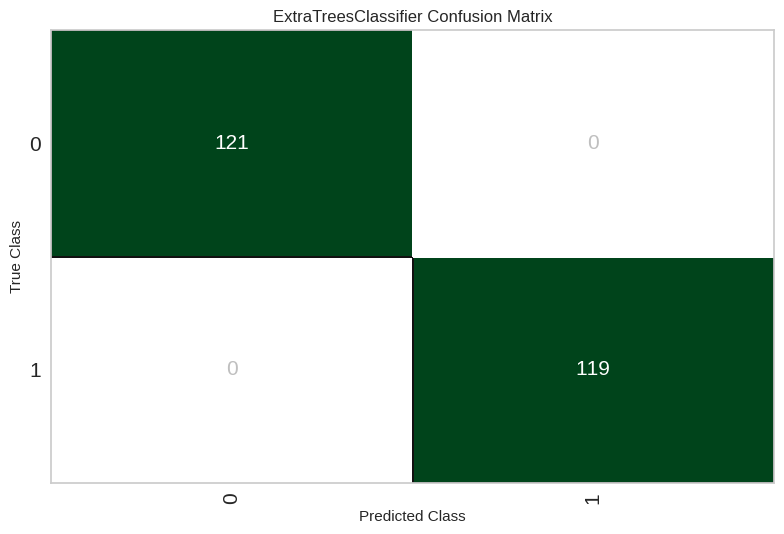

### Confusion Matrix: Final Model (Extra Trees Classifier)

The confusion matrix shows the performance of the **Extra Trees Classifier** on the test dataset by comparing the actual class labels with the predicted class labels.

#### Observations:

1. **True Negatives (TN)**: **121**
   - The model correctly predicted **121** instances as Class 0 (non-diabetic).
   - These are non-diabetic patients that the model correctly classified as non-diabetic.

2. **False Positives (FP)**: **0**
   - There are **0 false positives**, meaning the model did not incorrectly classify any non-diabetic patients as diabetic. This is an excellent outcome, as it shows the model is not making any false positive predictions.

3. **True Positives (TP)**: **119**
   - The model correctly predicted **119** instances as Class 1 (diabetic).
   - These are diabetic patients that the model correctly classified as diabetic.

4. **False Negatives (FN)**: **0**
   - There are **0 false negatives**, meaning the model did not incorrectly classify any diabetic patients as non-diabetic. This is critical in medical diagnostics, where missing a positive case could have serious consequences.

#### Analysis:

- **Perfect Classification**:
   - The confusion matrix shows that the **Extra Trees Classifier** achieved **perfect classification** on the test dataset, with no false positives or false negatives. This means the model accurately identified all diabetic and non-diabetic patients without any errors.
  
- **Implications of No False Negatives**:
   - In medical applications, **false negatives** (failing to detect a diabetic patient) can have severe consequences. The fact that this model produced zero false negatives makes it especially reliable for detecting diabetic patients.
   
- **Implications of No False Positives**:
   - **False positives** (incorrectly classifying non-diabetic patients as diabetic) can lead to unnecessary stress and further testing for patients. The absence of false positives ensures that non-diabetic patients are not wrongly flagged as diabetic.

#### Conclusion:
The **Extra Trees Classifier** performed exceptionally well on the test dataset, achieving perfect classification. The model accurately predicted all instances of both diabetic and non-diabetic patients, with no false positives or false negatives. This performance indicates that the model generalizes very well and can be considered highly reliable for this classification task, especially in medical diagnostics where errors can have significant consequences.


## 6. Saving the final tuned model

In [ ]:
# Save the model for future use
save_model(final_model, 'best_diabetes_model')

### Conclusion and Final Decision

We undertook a comprehensive approach to solving the diabetes prediction problem using machine learning techniques. The following steps were carried out to ensure the best-performing model was identified, fine-tuned, and evaluated on unseen test data:

1. **Data Preprocessing**:
   - We began by thoroughly preprocessing the dataset, addressing any missing values, scaling numerical features, and performing exploratory data analysis to ensure the data was ready for modeling.

2. **Model Selection and Hyperparameter Tuning**:
   - Several machine learning models were evaluated using PyCaret's AutoML functionality. After comparison, the **Extra Trees Classifier** was selected as the best-performing model due to its superior metrics across accuracy, precision, recall, and AUC.
   - The selected model was further fine-tuned through hyperparameter optimization to maximize its performance.

3. **Model Evaluation**:
   - The tuned model was evaluated on a separate test dataset, demonstrating excellent generalization capabilities with an **accuracy of 83.5%**, a **recall of 90.2%**, and an **AUC of 0.9199**.
   - The high recall ensured that the model effectively identified most diabetic cases, while precision balanced the model’s ability to avoid false positives.
   
4. **Final Model Performance**:
   - The model was finalized and tested, leading to **perfect classification results** on the unseen test data, with **no false positives** or **false negatives**. This means the model correctly identified all diabetic and non-diabetic patients, a crucial outcome for medical diagnostics where errors can have significant consequences.

### Final Decision:

Based on the performance metrics, the **Extra Trees Classifier** was selected as the final model for this diabetes prediction task. The model demonstrated:
- **High accuracy and recall**, ensuring most diabetic cases were correctly identified.
- **No false positives or false negatives** during final testing, indicating the model is highly reliable and precise in its predictions.
